In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

ANALYSING THE DATA

In [5]:
df = pd.read_csv("C:/Users/soumy/Documents/Python Scripts/Credit Risk Analysis Project/bankloans.csv")
df.head()

# all the dataset are numeric and not string so we dont need to encode 

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [6]:
df.isnull().sum() 

# how many null values in each column. 450 null values in default column

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [7]:
df.value_counts()

# we have 700 columns which are non-empty, so if we delete the 450 null, we will be left with 700

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [8]:
df = df.dropna()

# dropping the nulll values 

In [9]:
df.isnull().sum() 

# now, all the null values have been removed from the default column

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

VISUALISE THE DATA

<Axes: xlabel='age', ylabel='income'>

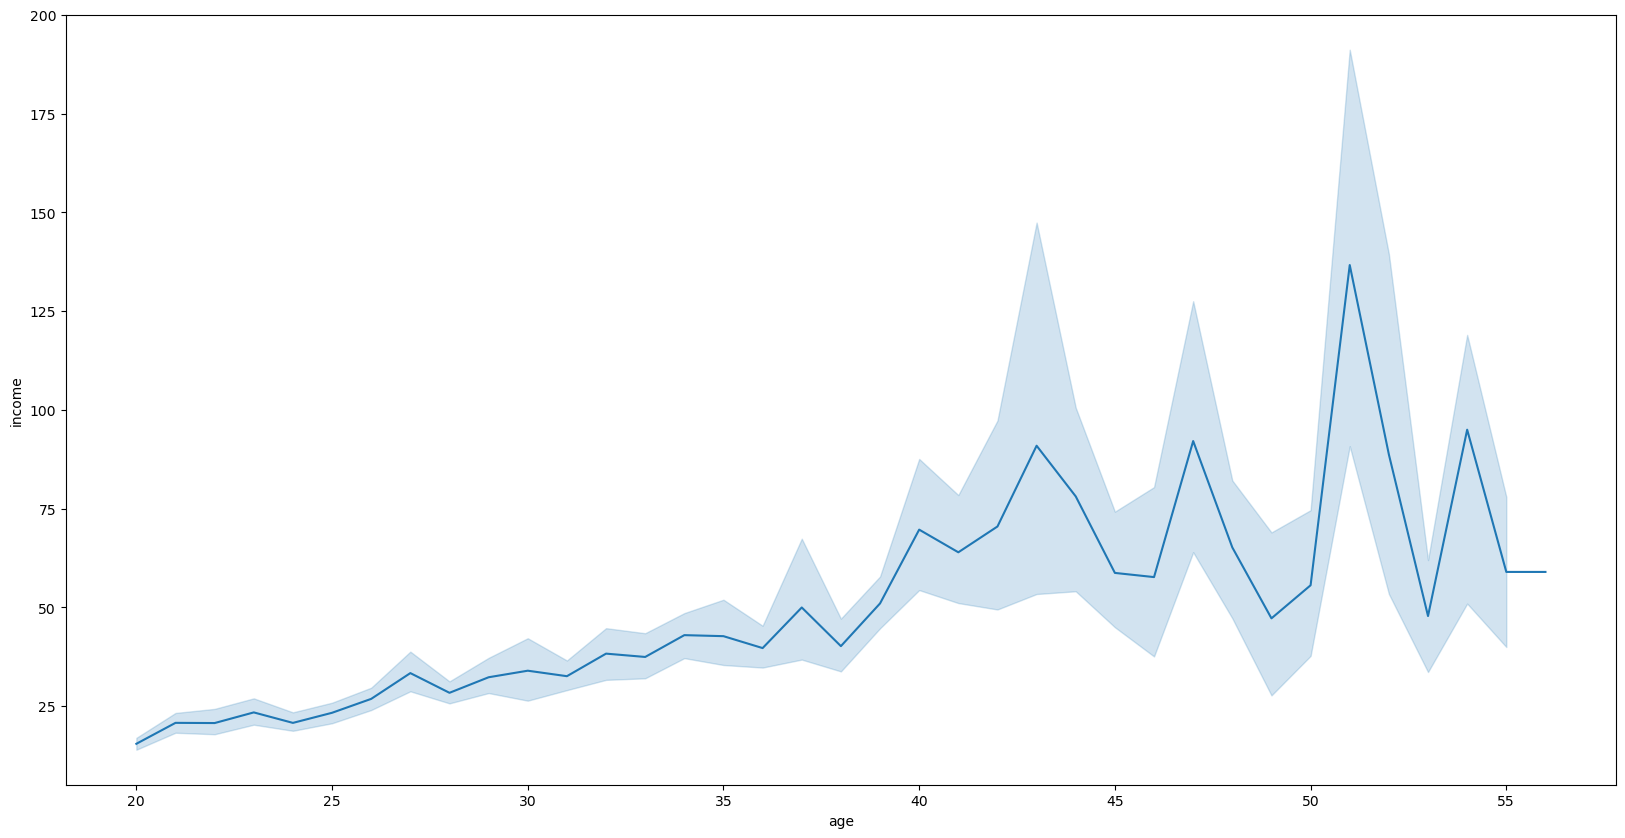

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

# the relation between age and income. (positive relation)

<Axes: xlabel='age', ylabel='debtinc'>

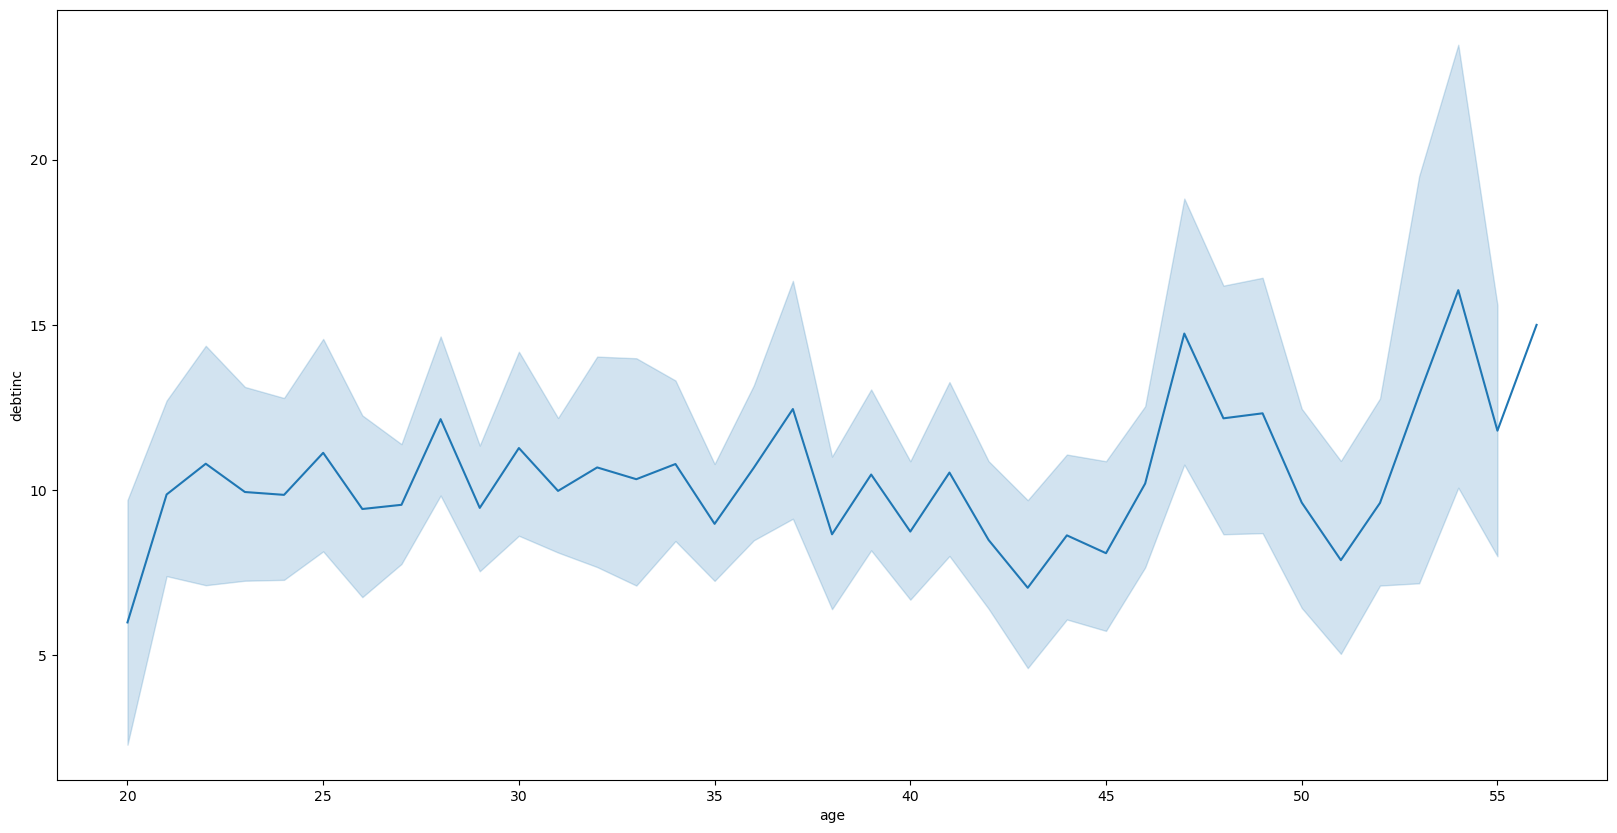

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

# age vs debt to income ratio. So its somewhat stable as everyone is trying to take debt according to their income

In [12]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

CREATING TRAINING AND TESTING DATA

In [13]:
x=df.drop(['default'],axis=1) # x column will be every column other than default column (axis =1 denotes columns and 0 denotes rows)
y=df['default'] 

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain) # fit_transform will scale all the values
xtest=sc.fit_transform(xtest)

# we scale all the values as the columns contain various scales

# **Creating Model**

Random Forest

In [16]:
rfc = RandomForestClassifier(n_estimators=200)

# 200 decision trees

In [17]:
rfc.fit(xtrain,ytrain) 

# fitting our data

RandomForestClassifier(n_estimators=200)

In [18]:
rfc.score(xtest,ytest)

# how well our model is performing. this is done using the test values.
# 82.1% accuracy

0.8214285714285714

In [19]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

# we use cross validation to ensure our model works well.
# cv=10 suggests that we use the cross value function 10 times
# we take the mean of all those scores
# now, the accuracy is 78.2 %

0.7803571428571429

SUPPORT VECTOR MACHINE (SVM)

In [20]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [21]:
sv.score(xtest,ytest)

0.7928571428571428

In [22]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

# grid search cv is used to find the best parameters possible for the svc 

In [23]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [24]:
model.best_params_

# gives the best parameters

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [25]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

# we get 82% with the right paramaters

0.8214285714285714

LOGISTIC REGRESSION

In [26]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

# in logistic regression, we are getting 83%

0.8357142857142857

<Axes: >

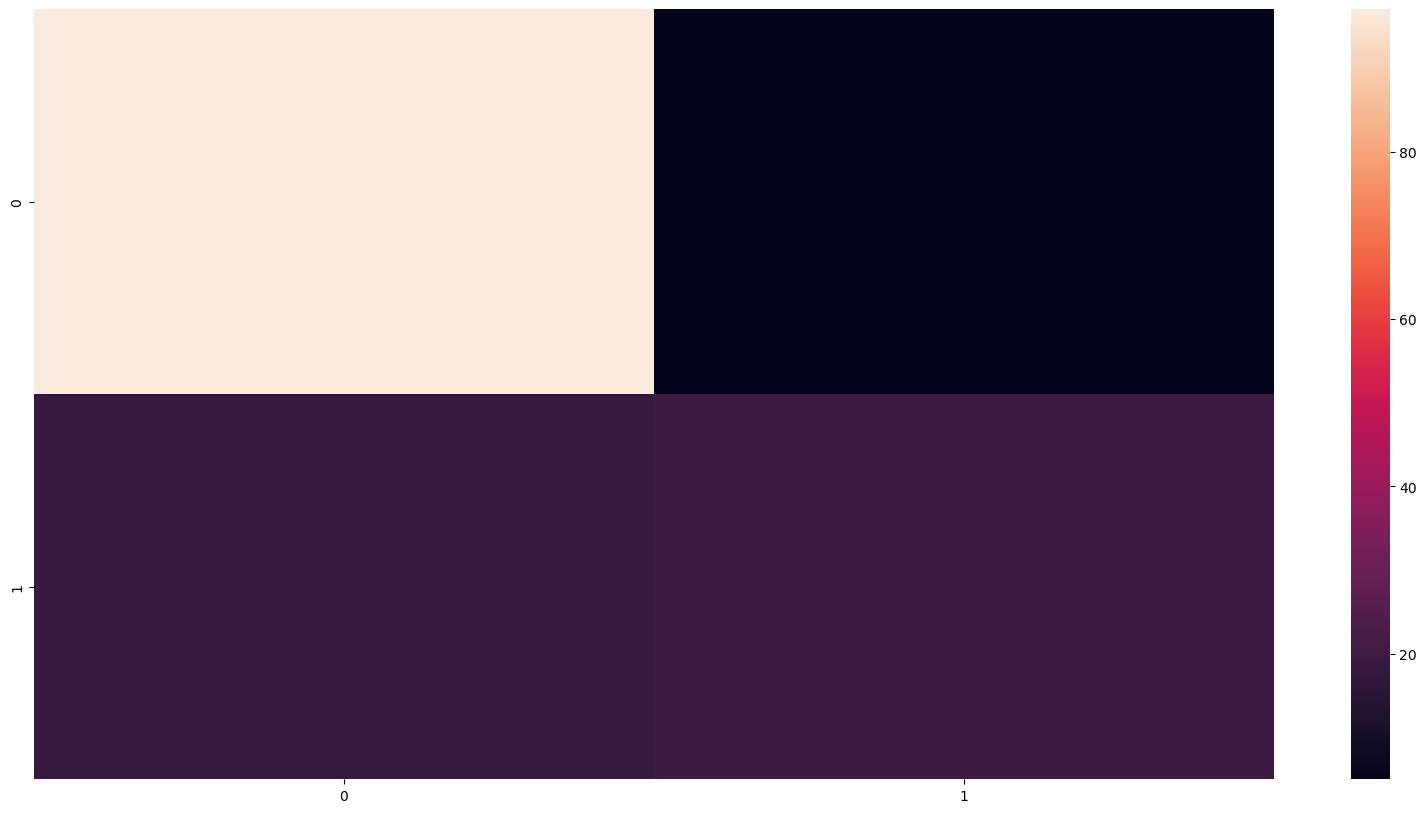

In [27]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)

# how often did i get right or wrong

# here, (0,0) is no defaulters that is true negative and (1,1) is tru positive

# The top-left block (light color) is very bright, thus, large number of True Negatives; model correctly classifies most non-defaulters.
# The bottom-right block (dark purple) is smaller,thus, fewer True Positives; fewer correctly predicted defaulters.
# The top-right and bottom-left blocks are very dark (almost black), thus, very few misclassifications.

# Our model predicts non-defaults very confidently (many TNs), but possibly struggles to identify defaulters (few TPs).
# This is common in credit risk datasets because defaults are rare (imbalanced data).

Now we’re moving beyond yes/no accuracy to understand how well the model ranks borrowers by risk, how stable it is, and how to use it for portfolio analysis.

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve


In [29]:
y_pred_proba = lr.predict_proba(xtest)[:, 1]  # probability of default (1)

# probability of how risky each borrower is (Predicted probability of default)

ROC-AUC 

In [30]:
roc_auc = roc_auc_score(ytest, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Theres a 91.02% chance that the model ranks a random defaulter higher than a random non-defaulter 

ROC-AUC Score: 0.9102167182662538


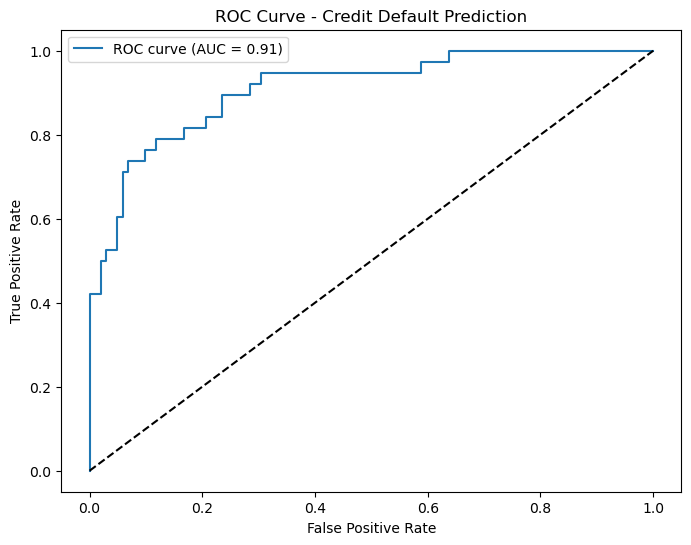

In [31]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Credit Default Prediction')
plt.legend()
plt.show()

# visualising the ROC curve
# A good model will have a curve that hugs the top-left corner — meaning high true positives and low false positives.
# thus, we have a good model in here

In [32]:
cv_auc = cross_val_score(lr, xtrain, ytrain, cv=5, scoring='roc_auc')
print("Cross-validated AUC:", cv_auc.mean())

# Cross validation: we test if this performance (AUC 0.91) is stable across data samples.

# with 0.83, the score dropped by 0.08 from 0.91, thus we may have mild overfitting

#Overall: The model generalizes well and can be reliably used for credit risk screening, but further tuning (regularization, threshold optimization, or feature engineering) could close the 0.08 gap.

Cross-validated AUC: 0.8378894889904445


BIAS OR FAIRNESS CHECK (to check whether the model is not unfairly penalising certain groups)

In [33]:
df['pred_prob'] = lr.predict_proba(sc.transform(df.drop('default', axis=1)))[:, 1]
df['pred_default'] = (df['pred_prob'] > 0.5).astype(int)

group_bias = df.groupby('ed')[['default', 'pred_default']].mean()
print(group_bias)

# It seems to underestimate default risk for lower-education groups (1–3) and overestimate or ignore others (like group 5).

     default  pred_default
ed                        
1   0.212366      0.107527
2   0.297980      0.171717
3   0.344828      0.229885
4   0.368421      0.394737
5   0.200000      0.000000


PORTFOLIO LEVEL RISK ANALYSIS

In [36]:
feature_cols = x.columns

# x=df.drop(['default'],axis=1) thst is only the feature columns and not the target column (default column)

In [37]:
df['PD'] = lr.predict_proba(sc.transform(df[feature_cols]))[:, 1]

df['risk_band'] = pd.qcut(df['PD'], 10, labels=False)
portfolio_summary = df.groupby('risk_band').agg({
    'PD': 'mean',
    'default': ['mean', 'count']
}).reset_index()

portfolio_summary.columns = ['risk_band', 'avg_pred_pd', 'actual_default_rate', 'n_loans']
print(portfolio_summary)

# In band 0, the model predicts an average PD of 0.7%, and actual defaults = 0% — close enough, no issue.
# In band 9, it predicts ~72% PD, and actual defaults are 80% — again, close.
# This means your predicted probabilities are roughly in line with actual defaults → good calibration.
# our model isn’t systematically over- or under-estimating risk.

# as we move from bands 0 to 9, predcited PD steadily rises, so deos the actual
# It means your model is discriminating well between good and bad borrowers — a strong indicator of predictive power.

# One small dip at band 4 (predicted 16%, actual 4%), but then the trend recovers.
# That’s minor — real-world data isn’t perfectly smooth.



   risk_band  avg_pred_pd  actual_default_rate  n_loans
0          0     0.007138             0.000000       70
1          1     0.026905             0.042857       70
2          2     0.060991             0.057143       70
3          3     0.103849             0.100000       70
4          4     0.160745             0.042857       70
5          5     0.226030             0.242857       70
6          6     0.298462             0.342857       70
7          7     0.392975             0.414286       70
8          8     0.507739             0.571429       70
9          9     0.715525             0.800000       70
